# Scenario comparison

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('scenario_comparison_table.xlsx', sheet_name = 'Capacity', usecols = "B:E, F:H", engine = 'openpyxl')

In [3]:
df

,EV Scenario,Reuse Scenario,V2G Scenario,Storage Demand Scenario,V2G Capacity,Reused batteries,New batteries
0,Slow EV,No reuse,No V2G,Low,15.245795,0.000000,503.501562
1,Slow EV,No reuse,No V2G,Medium,15.245795,0.000000,845.695049
2,Slow EV,No reuse,No V2G,High,15.245795,0.000000,1190.853726
3,Slow EV,No reuse,No V2G,CP4All,15.245795,0.000000,1580.247948
4,Slow EV,No reuse,Low,Low,604.722307,0.000000,47.248251
...,...,...,...,...,...,...,...
139,Fast EV,All reused,V2G mandate,CP4All,2113.116829,0.359732,0.000000
140,Fast EV,All reused,Early,Low,671.594436,0.068615,0.000000
141,Fast EV,All reused,Early,Medium,1121.135327,0.169030,0.000000
142,Fast EV,All reused,Early,High,1574.002424,0.296087,0.000000


In [4]:
df_ascend_v2g = df.sort_values(by = ['V2G Scenario'], ascending = False)
df_ascend_v2g.reset_index(inplace = True)

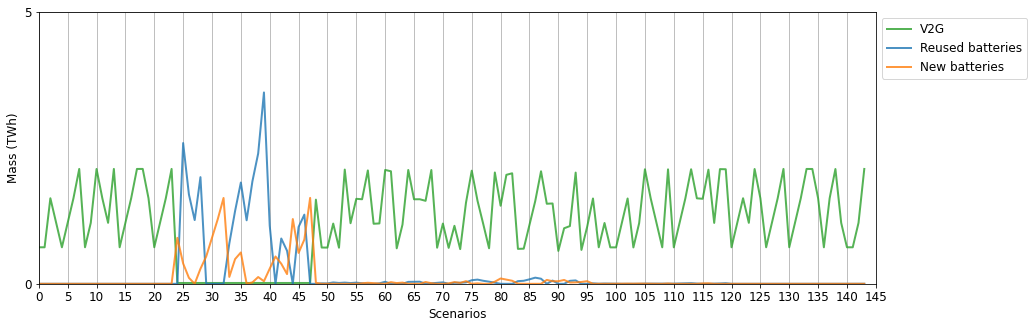

In [5]:
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 0.8     
plt.plot(df_ascend_v2g['V2G Capacity']/1000, label = 'V2G', alpha = transp, linewidth = 2, color = 'tab:green')
plt.plot(df_ascend_v2g['Reused batteries']/1000, label = 'Reused batteries', alpha = transp, linewidth = 2, color = 'tab:blue')
plt.plot(df_ascend_v2g['New batteries']/1000, label = 'New batteries', alpha = transp, linewidth = 2, color = 'tab:orange')
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 145))
plt.yticks(np.arange(0, 60, 5))
plt.ylim((0,5))
plt.xlabel('Scenarios')
plt.ylabel('Mass (TWh)')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))

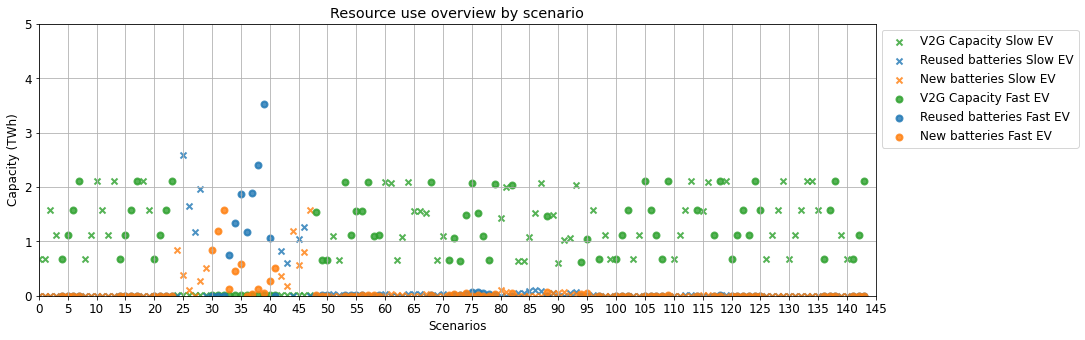

In [6]:
fig = plt.figure(figsize=[15, 5], facecolor ='white')
transp = 0.8     
for ev_scenario in ['Slow EV', 'Fast EV']:
    if ev_scenario == 'Slow EV':
        pmarker = 'x'
    if ev_scenario == 'Fast EV':
        pmarker = 'o'
    for col in ['V2G Capacity', 'Reused batteries', 'New batteries']:
        if col == 'V2G Capacity':
            pcolor = 'tab:green'
        if col == 'Reused batteries':
            pcolor = 'tab:blue'
        if col == 'New batteries':
            pcolor = 'tab:orange'
        # plot
        plt.scatter(df_ascend_v2g.loc[df_ascend_v2g['EV Scenario'] == ev_scenario, col].index,\
                    df_ascend_v2g.loc[df_ascend_v2g['EV Scenario'] == ev_scenario, col].values/1000,\
                    marker = pmarker, label = col+' '+ev_scenario, alpha = transp, linewidth = 2, c = pcolor)
# beautification
plt.grid()
plt.xticks(np.arange(0, 150, 5))
plt.xlim((0, 145))
plt.yticks(np.arange(0, 60, 1))
plt.ylim((0,5))
plt.xlabel('Scenarios')
plt.ylabel('Capacity (TWh)')
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.title('Resource use overview by scenario')
plt.savefig('mass_by_scenario.png', dpi = 300, bbox_inches = 'tight')